# Practical Lab 1 - Univariate Linear Regression on the California Housing Prices 

- Name: Ashley Sherry Kombarakaran Antony Babu

- Student ID: 9015649

- Section 2

# OBJECTIVE:
 In this report, we are interested in the exploration of the dependence of median house value on median income, population, and number of households as independent variables. In the present work, through the exploratory data analysis, by statistical exploration and fitting of the data to linear models, we will analyze which independent variable gives the best goodness-of-fit to predict housing prices.

# OBTAINING DATA

Source:(https://www.kaggle.com/datasets/camnugent/california-housing-prices/data)

Data Source: Downloaded from [Kaggle California Housing Prices]

In [1]:
import pandas as pd

# Load the dataset into Pandas
url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
housing_data = pd.read_csv(url)

# Display the first few rows of the dataset
housing_data.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Exploratory Data Analysis (EDA)
To perform Exploratory  Data Analysis (EDA) we use describe function in pandas , we can gather basic statistics about the dataset to understand its structure and characteristics

In [2]:
# Explore the basic statistics of the dataset
housing_data.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# CREATING THREE SEABORN SCATTER PLOTS 

 To create the three Seaborn scatter plots of median_house_value vs. median_income, population, and households, along with insights for each plot.

1. Scatter plot for Median House vs Median Income

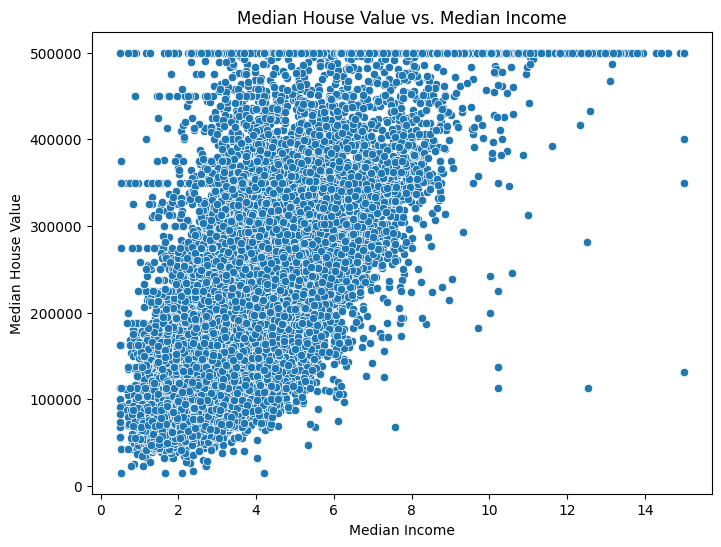

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Scatter plot of Median House Value vs. Median Income
plt.figure(figsize=(8, 6))
sns.scatterplot(x='median_income', y='median_house_value', data=housing_data)
plt.title('Median House Value vs. Median Income')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()


Median House Value vs. Median Income:

- Insight- From this problem, it is observed that median_income and median_house_value are strongly positively correlated. The increase in income also sees a rise in house value. This can intuitively be gauged from the fact that people earning higher incomes are capable of affording more expensive houses.

- Regression Expectation: In this case, linear regression carried out between the two variables should reflect an upward slope, which again would substantiate the fact that median_income could act as a strong predictor for median_house_value.

2. Scatter plot for Median House Value vs Population

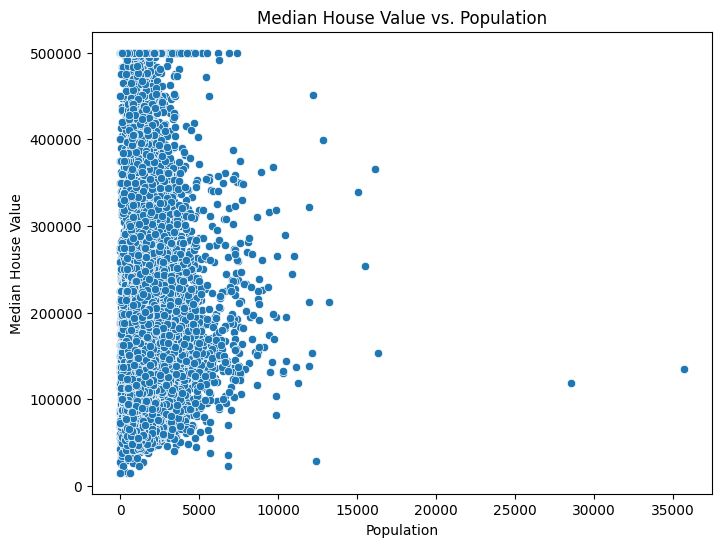

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Scatter plot of Median House Value vs. Population
plt.figure(figsize=(8, 6))
sns.scatterplot(x='population', y='median_house_value', data=housing_data)
plt.title('Median House Value vs. Population')
plt.xlabel('Population')
plt.ylabel('Median House Value')
plt.show()

Median House Value vs. Population

- Insight: There appears to be a very weak correlation between population and median house value. The data points are widely scattered without a clear linear trend.

- Regression Expectation: The regression line would be almost flat, with a very slight positive slope.

3. Scatter plot for Median House Values vs Number of households

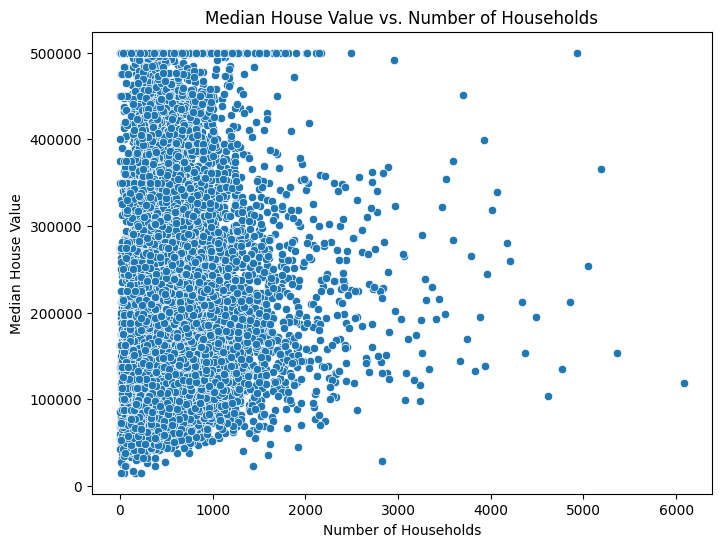

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# 3. Scatter plot of Median House Value vs. Number of Households
plt.figure(figsize=(8, 6))
sns.scatterplot(x='households', y='median_house_value', data=housing_data)
plt.title('Median House Value vs. Number of Households')
plt.xlabel('Number of Households')
plt.ylabel('Median House Value')
plt.show()



- Median House Value vs. Number of Households:

- Insight: This relationship might most likely reflect some sort of correlation, since the number of households reflects how an area is dense or developed. However, there could  be considerable spread since the size and quality of the house can vary significantly within the same area.

- Regression Expectation: The linear regression may show a moderate positive correlation,

# Description of Variables

Median Income: The average income in the neighborhood, a factor that is paramount as it forms the basis of determining how affordable it will be to invest in housing.

Population: The number of people residing in a particular area. It can reflect the balance between demand for and supply of housing.

Households: Number of separate living quarters; might determine demand for housing.

Median House Value: This is the dependent variable that is used to describe the middle value for any particular region concerning housing price.


# Data Preprocessing

To filter out records where median_house_value is equal to 500001 in the dataset, you can use the following Pandas code:

Now lets discuss about difference actual housing data and processed housing data

In [6]:
# Filter out records where median_house_value is capped at 500001
filtered_housing_data = housing_data[housing_data['median_house_value'] != 500001]

# Verify the filter by checking the maximum value in 'median_house_value'
max_value = filtered_housing_data['median_house_value'].max()
print("Maximum median_house_value after filtering:", max_value)


Maximum median_house_value after filtering: 500000.0


# Processed house median values and median income

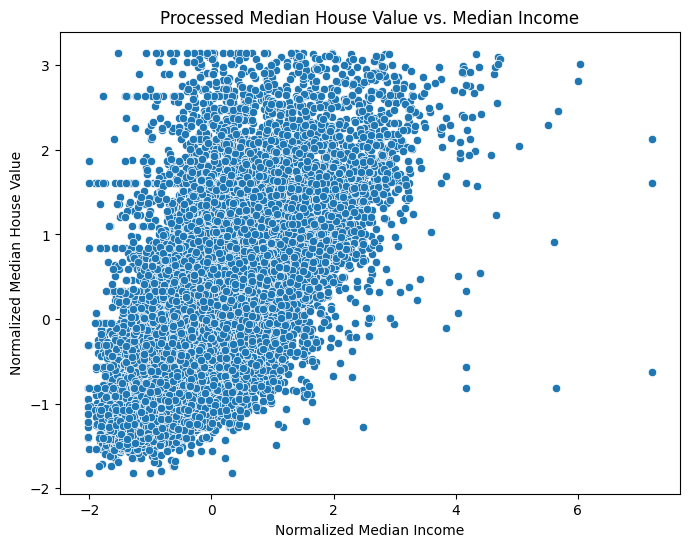

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming housing_data is your original DataFrame
# 1. Filter out entries with specific median house value
filtered_housing_data = housing_data[housing_data['median_house_value'] != 500001]

# 2. Check for missing values in median house value and median income columns
filtered_housing_data = filtered_housing_data.dropna(subset=['median_house_value', 'median_income'])

# 3. Normalize median house value and median income
filtered_housing_data['normalized_house_value'] = (filtered_housing_data['median_house_value'] - filtered_housing_data['median_house_value'].mean()) / filtered_housing_data['median_house_value'].std()
filtered_housing_data['normalized_income'] = (filtered_housing_data['median_income'] - filtered_housing_data['median_income'].mean()) / filtered_housing_data['median_income'].std()

# 4. Create a scatter plot of processed Median House Value vs. Median Income
plt.figure(figsize=(8, 6))
sns.scatterplot(x='normalized_income', y='normalized_house_value', data=filtered_housing_data)
plt.title('Processed Median House Value vs. Median Income')
plt.xlabel('Normalized Median Income')
plt.ylabel('Normalized Median House Value')
plt.show()


# Processed house median values and population

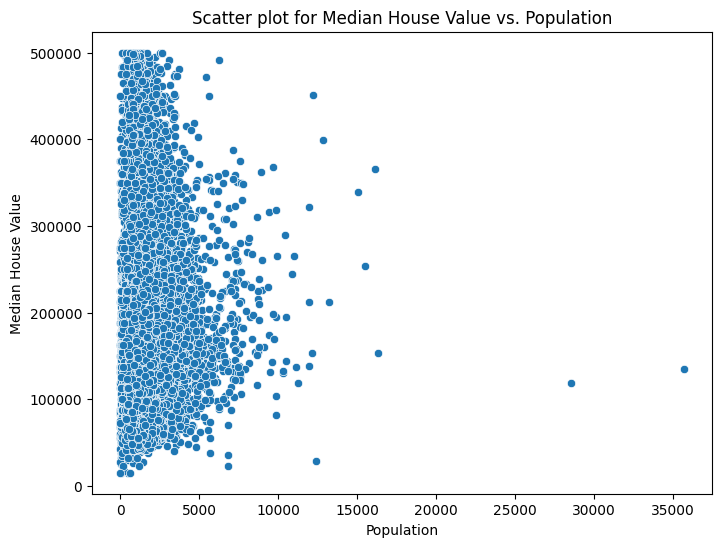

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming housing_data is your original DataFrame
# 1. Filter out entries with specific median house value
filtered_housing_data = housing_data[housing_data['median_house_value'] != 500001]

# 2. Check for missing values in median house value and population columns
filtered_housing_data = filtered_housing_data.dropna(subset=['median_house_value', 'population'])

# 3. Optional: Normalize median house value and population
filtered_housing_data['normalized_house_value'] = (filtered_housing_data['median_house_value'] - filtered_housing_data['median_house_value'].mean()) / filtered_housing_data['median_house_value'].std()
filtered_housing_data['normalized_population'] = (filtered_housing_data['population'] - filtered_housing_data['population'].mean()) / filtered_housing_data['population'].std()

# 4. Create a scatter plot of Median House Value vs. Population
plt.figure(figsize=(8, 6))
sns.scatterplot(x='population', y='median_house_value', data=filtered_housing_data)
plt.title('Scatter plot for Median House Value vs. Population')
plt.xlabel('Population')
plt.ylabel('Median House Value')
plt.show()


# Processed house median values and number of household

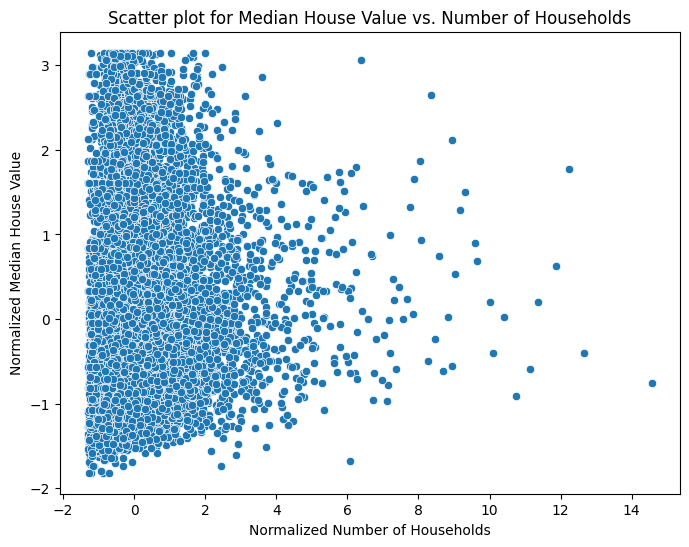

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming housing_data is your original DataFrame
# 1. Filter out entries with specific median house value (if needed)
filtered_housing_data = housing_data[housing_data['median_house_value'] != 500001]

# 2. Check for missing values in median house value and households columns
filtered_housing_data = filtered_housing_data.dropna(subset=['median_house_value', 'households'])

# 3. Normalize median house value and households
filtered_housing_data['normalized_house_value'] = (filtered_housing_data['median_house_value'] - filtered_housing_data['median_house_value'].mean()) / filtered_housing_data['median_house_value'].std()
filtered_housing_data['normalized_households'] = (filtered_housing_data['households'] - filtered_housing_data['households'].mean()) / filtered_housing_data['households'].std()

# 4. Create a scatter plot of processed Median House Value vs. Number of Households
plt.figure(figsize=(8, 6))
sns.scatterplot(x='normalized_households', y='normalized_house_value', data=filtered_housing_data)
plt.title('Scatter plot for Median House Value vs. Number of Households')
plt.xlabel('Normalized Number of Households')
plt.ylabel('Normalized Median House Value')
plt.show()


# Train and Test Split

This allows you to train a model on one portion of the data and evaluate its performance on an unseen portion.

Spliting the data for training and testing

In [10]:
train_size = int(len(filtered_housing_data) * 0.8)
train = filtered_housing_data[:train_size]
test = filtered_housing_data[train_size:]

Train/Test Split for median income

<Axes: xlabel='median_income', ylabel='median_house_value'>

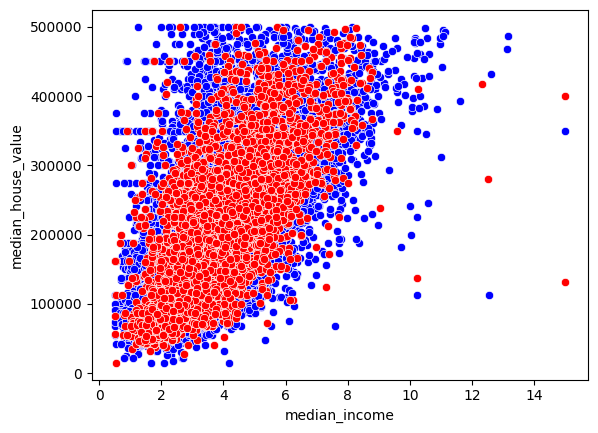

In [11]:
import seaborn as sns
import pandas as pd
sns.scatterplot(x="median_income", y="median_house_value", data=train, color="blue")
sns.scatterplot(x="median_income", y="median_house_value", data=test, color="red")

Train/Test Split for population

<Axes: xlabel='population', ylabel='median_house_value'>

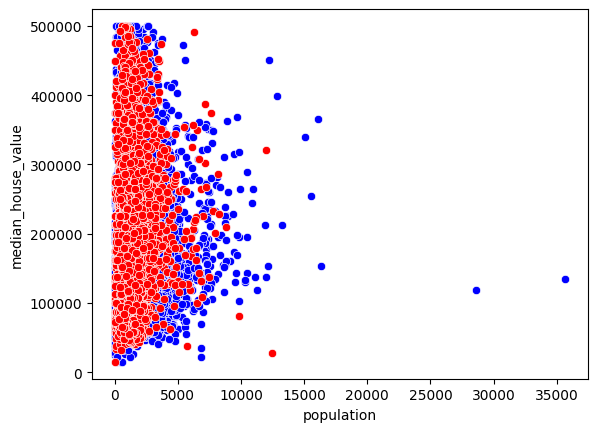

In [12]:
import pandas as pd
import seaborn as sns
sns.scatterplot(x="population", y="median_house_value", data=train, color="blue")
sns.scatterplot(x="population", y="median_house_value", data=test, color="red")

Train/Test split for number of households

<Axes: xlabel='households', ylabel='median_house_value'>

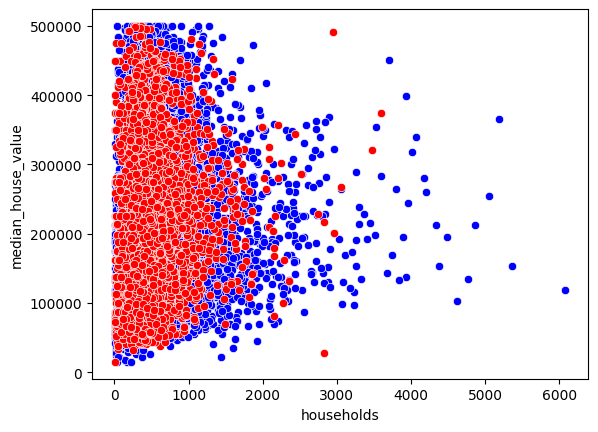

In [13]:
import pandas as pd
import seaborn as sns
sns.scatterplot(x='households', y='median_house_value', data=train, color="blue")
sns.scatterplot(x='households', y='median_house_value', data=test, color="red")

# Creation of Linear Regression

# Defining a model

Creating a linear regression object

In [44]:
from sklearn import linear_model

In [45]:
model = linear_model.LinearRegression

# Median House Value vs Median Income

In [ ]:
#Training the model
model.fit(X=train[["median_income"]], y=train[["median_house_value"]])

In [ ]:
#Testing the model
model.fit(X=test[["median_income"]], y=test[["median_house_value"]])

# Median House Value vs population

In [ ]:
#Training the model
model.fit(X=train[["population"]], y=train[["median_house_value"]])

In [189]:
#Testing the model
model.fit(X=test[["population"]], y=test[["median_house_value"]])

LinearRegression()

# Median House Value vs number of households

In [190]:
#Training the model
model.fit(X=train[["households"]], y=train[["median_house_value"]])

LinearRegression()

In [191]:
#Testing the model
model.fit(X=test[["households"]], y=test[["median_house_value"]])

LinearRegression()

Calculating median house value vs median house median house value vs population median house value vs number of households

# calculating intercept slope mse mae 

In [192]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Function to perform linear regression and calculate metrics
def perform_regression(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return model.coef_[0], model.intercept_, mean_squared_error(y_test, y_pred), mean_absolute_error(y_test, y_pred)

# Features to analyze
features = ['median_income', 'population', 'households']
results = []

# Calculate metrics for each feature
for feature in features:
    X = filtered_housing_data[[feature]]
    y = filtered_housing_data['median_house_value']
    slope, intercept, mse, mae = perform_regression(X,y )
    results.append([feature, slope, intercept, mse, mae])

# Create and print results DataFrame
results_df = pd.DataFrame(results, columns=['Feature', 'Slope', 'Intercept', 'MSE', 'MAE'])
print(results_df)


         Feature         Slope      Intercept           MSE           MAE
0  median_income  39789.248159   46223.838844  5.785043e+09  57910.581846
1     population      1.124214  190568.313003  9.972783e+09  80145.949741
2     households     23.695882  180285.885005  9.878391e+09  79561.412958


# Scatter plot with line parameters

# Median House value vs  Median Income

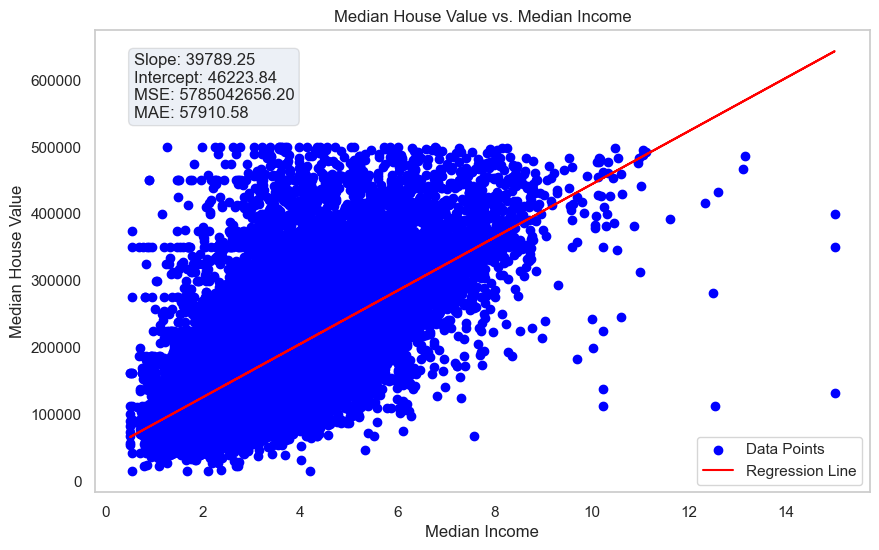

In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Function to perform linear regression and calculate metrics
def perform_regression(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return model.coef_[0], model.intercept_, mean_squared_error(y_test, y_pred), mean_absolute_error(y_test, y_pred), y_pred, y_test

# 1. Median House Value vs. Median Income
X_income = filtered_housing_data[['median_income']]
y_house_value = filtered_housing_data['median_house_value']
slope_income, intercept_income, mse_income, mae_income, y_pred_income, y_test_income = perform_regression(X_income, y_house_value)

# Create scatter plot and regression line
plt.figure(figsize=(10, 6))
plt.scatter(filtered_housing_data['median_income'], filtered_housing_data['median_house_value'], color='blue', label='Data Points')
plt.plot(X_income, intercept_income + slope_income * X_income, color='red', label='Regression Line')

# Add annotations
textstr = f'Slope: {slope_income:.2f}\nIntercept: {intercept_income:.2f}\nMSE: {mse_income:.2f}\nMAE: {mae_income:.2f}'
plt.gca().add_artist(plt.Text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=12,
                               verticalalignment='top', bbox=dict(boxstyle='round', alpha=0.1, edgecolor='black')))

# Labels and title
plt.title('Median House Value vs. Median Income')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.legend()
plt.grid()
plt.show()


# Median House Value vs Population

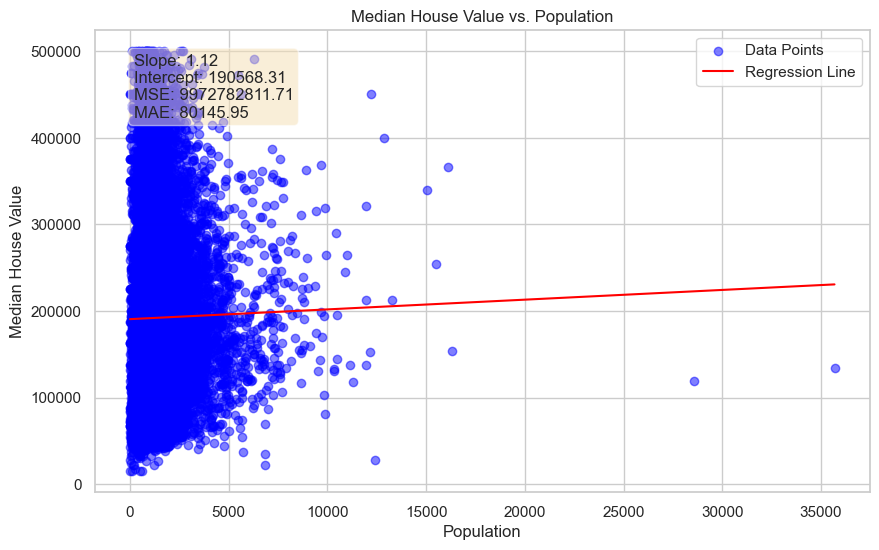

In [194]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Function to perform linear regression and calculate metrics
def perform_regression(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return model.coef_[0], model.intercept_, mean_squared_error(y_test, y_pred), mean_absolute_error(y_test, y_pred)

# Calculate metrics for Median House Value vs. Population
X_population = filtered_housing_data[['population']]
y_house_value = filtered_housing_data['median_house_value']
slope_population, intercept_population, mse_population, mae_population = perform_regression(X_population, y_house_value)

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_housing_data['population'], filtered_housing_data['median_house_value'], color='blue', alpha=0.5, label='Data Points')

# Regression line
x_line = pd.Series(range(int(X_population['population'].min()), int(X_population['population'].max())))
y_line = slope_population * x_line + intercept_population
plt.plot(x_line, y_line, color='red', label='Regression Line')

# Adding text box with parameters
textstr = '\n'.join((
    f'Slope: {slope_population:.2f}',
    f'Intercept: {intercept_population:.2f}',
    f'MSE: {mse_population:.2f}',
    f'MAE: {mae_population:.2f}'
))

# Place text box in upper left in axes coords
plt.gca().text(0.05, 0.95, textstr, transform=plt.gca().transAxes,
        fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Labels and title
plt.title('Median House Value vs. Population')
plt.xlabel('Population')
plt.ylabel('Median House Value')
plt.legend()
plt.grid(True)
plt.show()


# Median house value vs Number of Household

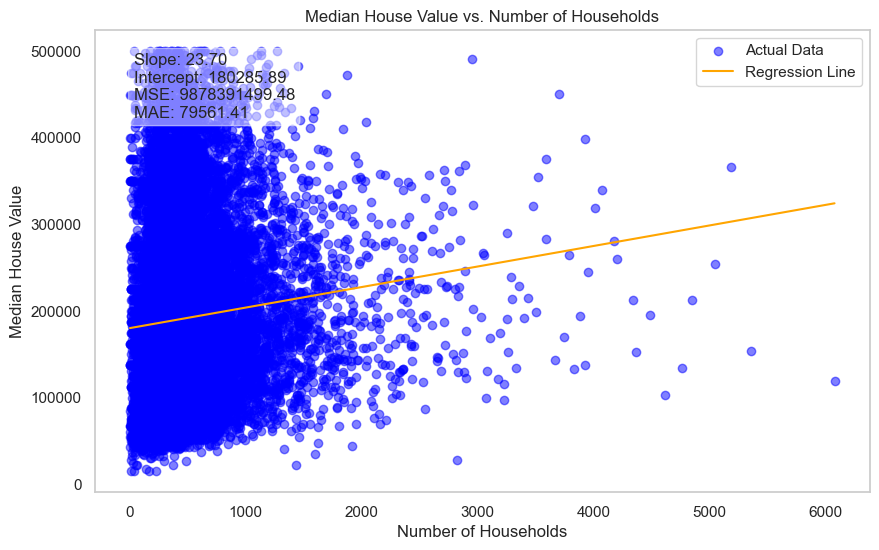

In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming filtered_housing_data is already defined

# Function to perform linear regression
def perform_regression(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return model.coef_[0], model.intercept_, mean_squared_error(y_test, y_pred), mean_absolute_error(y_test, y_pred), y_pred, y_test

# Feature: Number of Households
X_households = filtered_housing_data[['households']]
y_house_value = filtered_housing_data['median_house_value']

# Calculate metrics
slope_households, intercept_households, mse_households, mae_households, y_pred, y_test = perform_regression(X_households, y_house_value)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_housing_data['households'], filtered_housing_data['median_house_value'], color='blue', alpha=0.5, label='Actual Data')

# Plot the regression line
x_line = np.linspace(X_households.min(), X_households.max(), 100).reshape(-1, 1)
y_line = intercept_households + slope_households * x_line
plt.plot(x_line, y_line, color='orange', label='Regression Line')

# Add text box with parameters
textstr = f'Slope: {slope_households:.2f}\nIntercept: {intercept_households:.2f}\nMSE: {mse_households:.2f}\nMAE: {mae_households:.2f}'
plt.gca().add_artist(plt.Text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=12,
                               verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5)))

# Labeling the plot
plt.title('Median House Value vs. Number of Households')
plt.xlabel('Number of Households')
plt.ylabel('Median House Value')
plt.legend()
plt.grid()
plt.show()


# CONCLUSION

Therefore, by the result from these variables, median income is the most reliable variable in predicting the median house value. However, judging by the high results of MSE and MAE across all the models, other underlying factors should be considered in order to give an accurate prediction of house value. 

Additional Insights:

 Factors beyond income, population, and number of households likely influence house values significantly (e.g., location, property features)

Goodness-of-fit:

The Median Income model has the best fit, with the lowest MSE and MAE.